In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('dataset.csv')

In [18]:
df.head(5)

,Timestamp,Age,Sex,Height in (cm),Weight in (kilograms)
0,2023/03/18 1:41:28 PM GMT+8,21,Female,158,47
1,2023/03/18 1:41:32 PM GMT+8,20,Male,180,54
2,2023/03/18 1:41:52 PM GMT+8,20,Male,178,85
3,2023/03/18 1:41:57 PM GMT+8,21,Male,152.4,43
4,2023/03/18 1:42:00 PM GMT+8,21,Male,165,89


In [19]:
df.dtypes

Timestamp                object
Age                       int64
Sex                      object
Height in (cm)           object
Weight in (kilograms)    object
dtype: object

In [20]:
df.shape

(100, 5)

In [21]:
df['Height in (cm)'] = df['Height in (cm)'].str.extract(r'(\d+)', expand=False);
df['Weight in (kilograms)'] = df['Weight in (kilograms)'].str.extract(r'(\d+)', expand=False);

In [22]:
df.dtypes

Timestamp                object
Age                       int64
Sex                      object
Height in (cm)           object
Weight in (kilograms)    object
dtype: object

In [23]:
df['Height in (cm)'] = pd.to_numeric(df['Height in (cm)']);
df['Weight in (kilograms)'] = pd.to_numeric(df['Weight in (kilograms)']);

In [24]:
df.dtypes

Timestamp                object
Age                       int64
Sex                      object
Height in (cm)            int64
Weight in (kilograms)     int64
dtype: object

In [25]:
df.isna().sum()

Timestamp                0
Age                      0
Sex                      0
Height in (cm)           0
Weight in (kilograms)    0
dtype: int64

In [26]:
df.drop_duplicates()

,Timestamp,Age,Sex,Height in (cm),Weight in (kilograms)
0,2023/03/18 1:41:28 PM GMT+8,21,Female,158,47
1,2023/03/18 1:41:32 PM GMT+8,20,Male,180,54
2,2023/03/18 1:41:52 PM GMT+8,20,Male,178,85
3,2023/03/18 1:41:57 PM GMT+8,21,Male,152,43
4,2023/03/18 1:42:00 PM GMT+8,21,Male,165,89
...,...,...,...,...,...
95,2023/03/18 1:49:45 PM GMT+8,30,Male,200,50
96,2023/03/18 1:49:54 PM GMT+8,22,Male,174,65
97,2023/03/18 1:50:06 PM GMT+8,21,Male,160,45
98,2023/03/18 1:50:21 PM GMT+8,25,Male,175,65


In [27]:
df.drop(['Timestamp'],axis=1,inplace=True)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age', ylabel='count'>

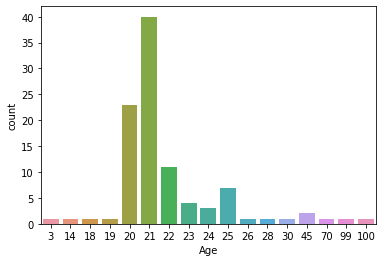

In [29]:
sns.countplot(df['Age'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Sex', ylabel='count'>

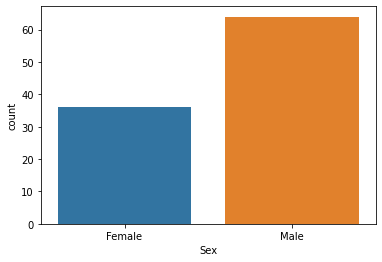

In [35]:
sns.countplot(df['Sex'])

In [36]:
df['Sex'] = df['Sex'].map({'Male': 0,'Female': 1})

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\si

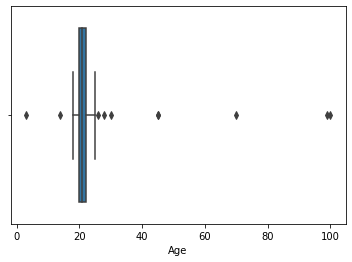

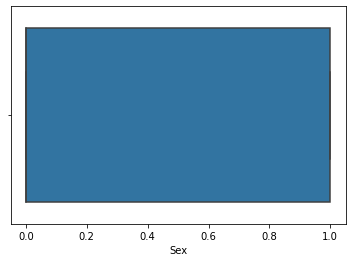

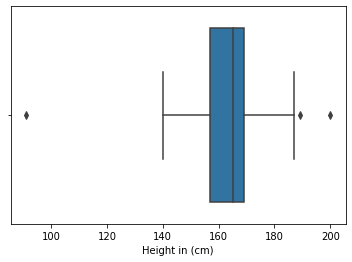

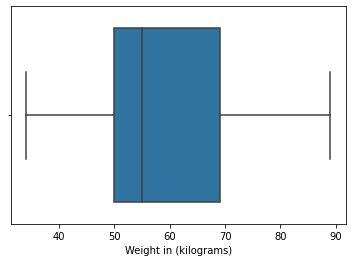

In [38]:
for col in df.columns:
    plt.figure();
    sns.boxplot(df[col])

In [41]:
#cleaning outliers
def removeOutliers(df,col):
    q3 = df[col].quantile(0.75);
    q1 = df[col].quantile(0.25);
    iqr = q3 - q1;
    
    max_ = q3 + (iqr * 1.5);
    min_ = q1 - (iqr * 1.5);
    
    df.loc[df[col] >= max_,col] = max_;
    df.loc[df[col] <= min_,col] = min_;

In [42]:
for col in df.columns:
    removeOutliers(df,col)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\si

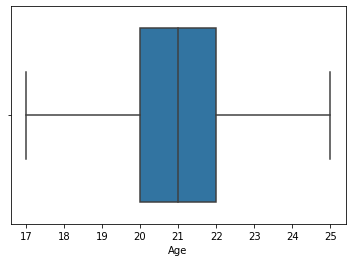

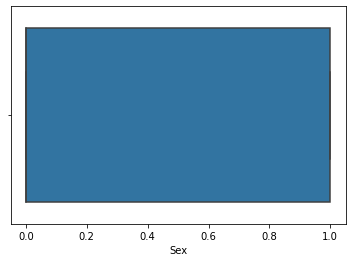

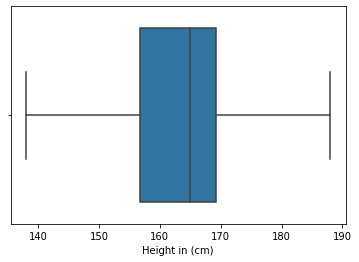

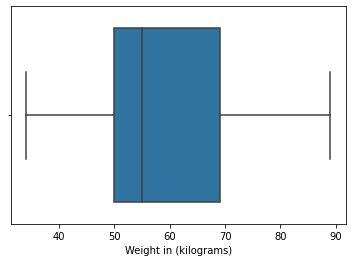

In [43]:
for col in df.columns:
    plt.figure();
    sns.boxplot(df[col])

<AxesSubplot: >

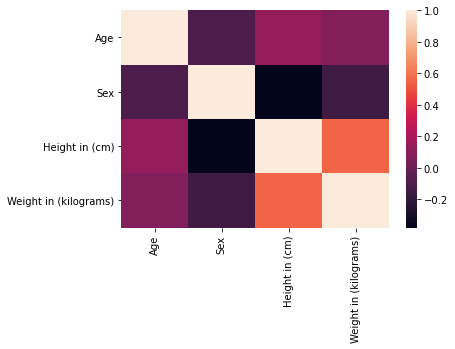

In [44]:
sns.heatmap(df.corr())

In [45]:
corr = df.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()
corr_df

<ipython-input-45-7e1a08d8dabf>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))


,,0


In [46]:
from sklearn.model_selection import train_test_split

X = df.drop(['Weight in (kilograms)'],axis=1);
y = df['Weight in (kilograms)'];

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,
                                                 train_size=.8);


In [48]:
from sklearn.metrics import r2_score;
from sklearn.metrics import mean_absolute_error;
from sklearn.metrics import mean_squared_error;

def evaluate_model(model):
    y_pred = model.predict(X_test);
    print('R^2 score:', r2_score(y_test,y_pred));
    print('MAE:',mean_absolute_error(y_test,y_pred));
    print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)));
    
    plt.scatter(y_train, model.predict(X_train),color='g')
    plt.plot(y_pred,y_pred)
    plt.show()

C:\Users\admin\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\admin\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\admin\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


R^2 score: 0.11088024693878418
MAE: 9.879700697154195
RMSE: 12.528930217818186


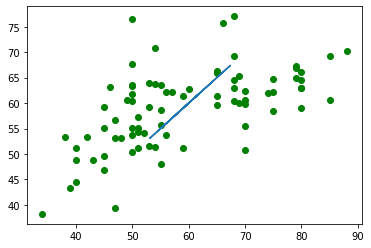

R^2 score: -0.05444863179362325
MAE: 10.663876957090942
RMSE: 13.644152811485371


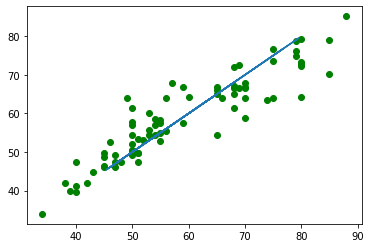

R^2 score: 0.20749662072861974
MAE: 9.06248610203565
RMSE: 11.828629320862252


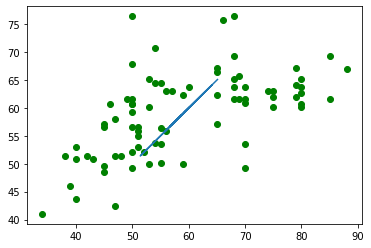

R^2 score: -1.106791752572224e+24
MAE: 13973391623363.387
RMSE: 13978701081167.24


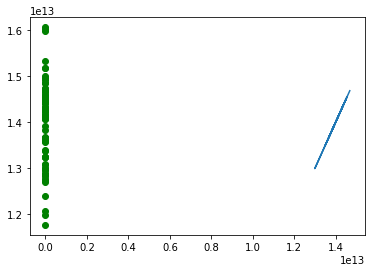

R^2 score: 0.2081277662503329
MAE: 9.082604197660764
RMSE: 11.823918253629113


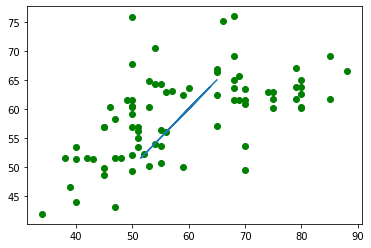

R^2 score: 0.06844807366701033
MAE: 10.481794915617503
RMSE: 12.824410029084742


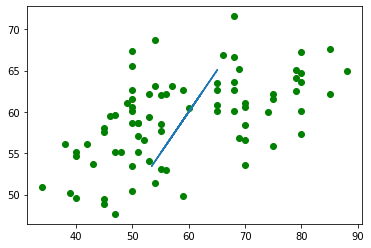

R^2 score: -0.1346828202187622
MAE: 11.749872016906739
RMSE: 14.153736323304264


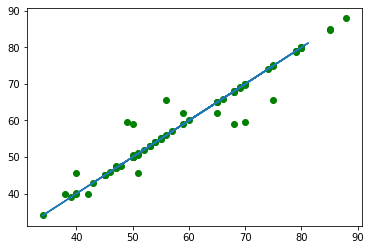

R^2 score: 0.13635893870103832
MAE: 9.589178403019503
RMSE: 12.348110356339213


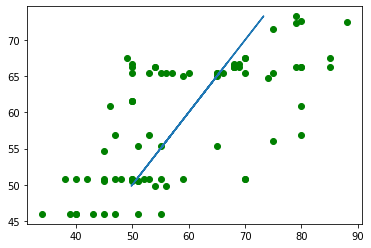

R^2 score: 0.14791725787703414
MAE: 9.9360623015873
RMSE: 12.265203142296894


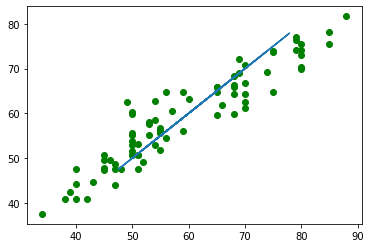

In [50]:
from sklearn.linear_model import LinearRegression;
from sklearn.ensemble import GradientBoostingRegressor;
from sklearn.linear_model import ElasticNet;
from sklearn.linear_model import SGDRegressor;
from sklearn.linear_model import BayesianRidge;
from sklearn.kernel_ridge import KernelRidge;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor;
from sklearn.ensemble import RandomForestRegressor;

models = [
    LinearRegression(),
    GradientBoostingRegressor(),
    ElasticNet(),
    SGDRegressor(),
    BayesianRidge(),
    KernelRidge(),
    XGBRegressor(),
    LGBMRegressor(),
    RandomForestRegressor()
];

for model in models:
    model.fit(X_train,y_train);
    evaluate_model(model);

In [52]:
rf = RandomForestRegressor();
rf.fit(X_train,y_train);

rf.feature_importances_

array([0.16828592, 0.08537744, 0.74633664])

In [53]:
X.columns

Index(['Age', 'Sex', 'Height in (cm)'], dtype='object')

In [57]:
X = df.drop(['Weight in (kilograms)'],axis=1);
y = df['Weight in (kilograms)'];

from sklearn.preprocessing import MinMaxScaler;

scaler = MinMaxScaler();
X_scaled = X.copy();

for col in X_scaled.columns:
    X_scaled[col] = scaler.fit_transform(X_scaled[col].values.reshape(-1,1));

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42,
                                                 train_size=.8);

R^2 score: 0.11088024693878451
MAE: 9.879700697154197
RMSE: 12.528930217818184


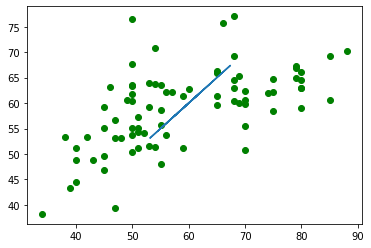

R^2 score: -0.041876391317657635
MAE: 10.646984374370744
RMSE: 13.562568963405585


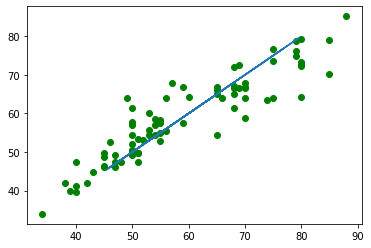

R^2 score: 0.014237089597262553
MAE: 10.60414568316951
RMSE: 13.192287210017954


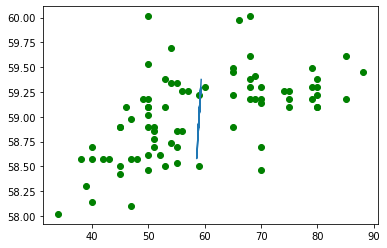

R^2 score: 0.12514415317944572
MAE: 9.652870088755177
RMSE: 12.428024772914192


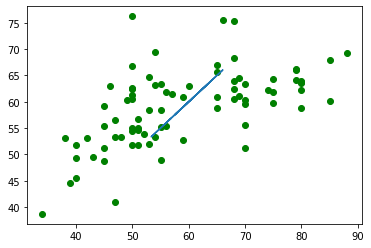

R^2 score: 0.11521260988295379
MAE: 9.828995051747507
RMSE: 12.498368442527388


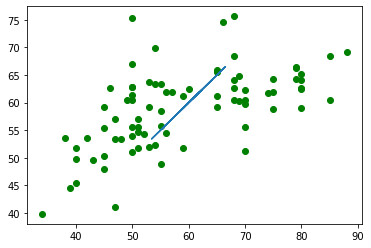

R^2 score: -0.19981402220117084
MAE: 10.440114170325302
RMSE: 14.55428341140905


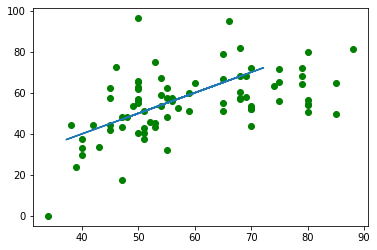

R^2 score: -0.1346828202187622
MAE: 11.749872016906739
RMSE: 14.153736323304264


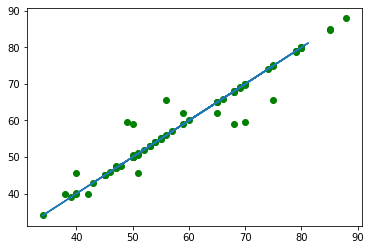

R^2 score: 0.13635893870103832
MAE: 9.589178403019503
RMSE: 12.348110356339213


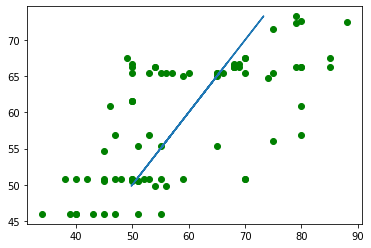

R^2 score: 0.1575310534315113
MAE: 9.92865
RMSE: 12.195814549125723


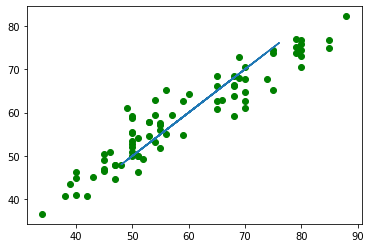

In [58]:
for model in models:
    model.fit(X_train,y_train);
    evaluate_model(model);

In [73]:
from sklearn.model_selection import train_test_split

X = df['Height in (cm)'].values.reshape(-1,1);
y = df['Weight in (kilograms)'];

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,
                                                 train_size=.8);


R^2 score: 0.2183943617230807
MAE: 8.984817258351658
RMSE: 11.7470198534688


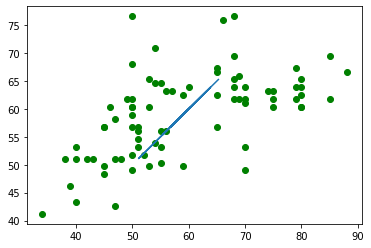

R^2 score: 0.23016463055711034
MAE: 8.95983280401983
RMSE: 11.658234620865295


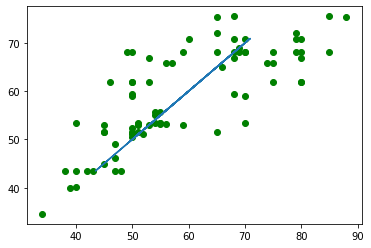

R^2 score: 0.21666910001866835
MAE: 9.002199826238055
RMSE: 11.759977482618924


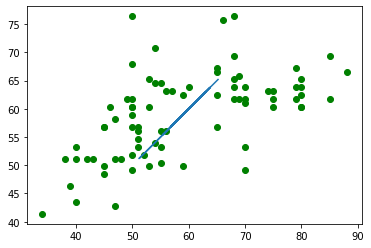

R^2 score: -8.991311348987087e+23
MAE: 12594402744687.766
RMSE: 12599269894179.068


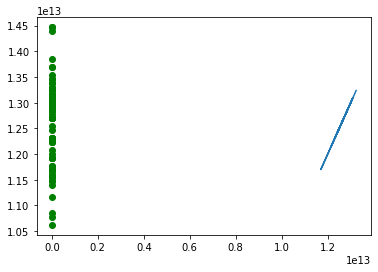

R^2 score: 0.2140596608641021
MAE: 9.02823263638051
RMSE: 11.779548670235323


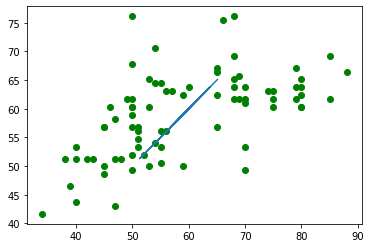

R^2 score: 0.1267255557763306
MAE: 9.829635508917272
RMSE: 12.416787149971157


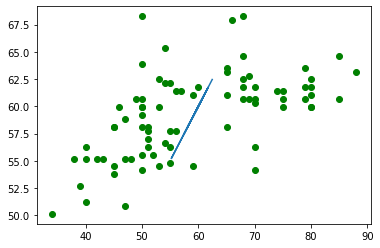

R^2 score: 0.25411721657763886
MAE: 8.911343383789063
RMSE: 11.475434868152833


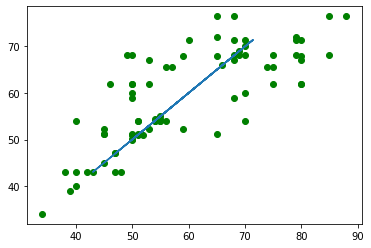

R^2 score: 0.26144810952028164
MAE: 8.824217260860513
RMSE: 11.418902585808947


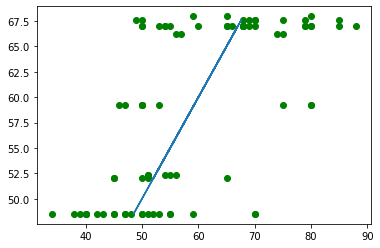

R^2 score: 0.24503096541524583
MAE: 8.923494429875683
RMSE: 11.545119447452173


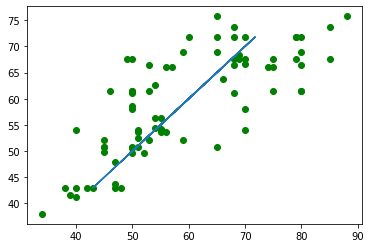

In [62]:
for model in models:
    model.fit(X_train,y_train);
    evaluate_model(model);

In [74]:
rf = RandomForestRegressor();
rf.fit(X_train,y_train);


In [83]:
params = pd.DataFrame([[22,0,167]]);

rf.predict(params)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([59.49764286])